# Keras FC

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import numpy as np

Using TensorFlow backend.


### 提取数据

In [2]:
f = np.load('mnist.npz')
train_images = f['x_train']
train_labels = f['y_train']
test_images = f['x_test']
test_labels = f['y_test']

### 改变形状，缩放值

In [3]:
train_images: np.ndarray = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images: np.ndarray = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### 标签分类编码

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 网络架构

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation=relu, input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation=softmax))

### 模型结构

In [6]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 编译步骤

损失函数、优化器、监控指标

In [7]:
network.compile(optimizer=RMSprop(),
                loss=categorical_crossentropy,
                metrics=['accuracy'])

### 模型拟合

In [8]:
epochs = 8
log = network.fit(train_images, train_labels,
                    epochs=epochs, batch_size=128,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 3s 44us/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0878 - val_acc: 0.9804
Epoch 2/8
60000/60000 [==============================] - 3s 43us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0838 - val_acc: 0.9831
Epoch 3/8
60000/60000 [==============================] - 3s 43us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0838 - val_acc: 0.9828
Epoch 4/8
60000/60000 [==============================] - 3s 43us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0863 - val_acc: 0.9831
Epoch 5/8
60000/60000 [==============================] - 3s 43us/step - loss: 9.0304e-04 - acc: 0.9998 - val_loss: 0.0874 - val_acc: 0.9830
Epoch 6/8
60000/60000 [==============================] - 3s 43us/step - loss: 9.9255e-04 - acc: 0.9998 - val_loss: 0.0937 - val_acc: 0.9824
Epoch 7/8
60000/60000 [==============================] - 3s 44us/step - loss: 8.7154e-04 - acc: 0.9999 - val_loss: 0.0988 - va

### 绘制 loss 和 accuracy

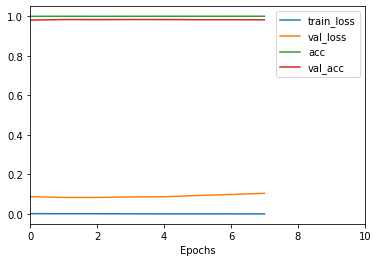

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.plot(log.history['loss'], label='train_loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.plot(log.history['acc'], label='acc')
plt.plot(log.history['val_acc'], label='val_acc')
plt.xlabel('Epochs')
plt.xlim((0, epochs + 2))
plt.legend(loc='upper right')
plt.show()